# MNISTデータセットの前処理

## パッケージの読み込み

In [1]:
using Flux
using Flux.Data: DataLoader
using Flux: onehotbatch, onecold
using Flux.Losses: logitcrossentropy
using MLDatasets
using Plots

## データセットの読み込み

In [2]:
x_train, y_train = MLDatasets.MNIST.traindata(Float32)
x_test, y_test = MLDatasets.MNIST.testdata(Float32)

┌ Warning: MNIST.traindata() is deprecated, use `MNIST(split=:train)[:]` instead.
└ @ MLDatasets C:\Users\stone\.julia\packages\MLDatasets\268Pz\src\datasets\vision\mnist.jl:187
┌ Warning: MNIST.testdata() is deprecated, use `MNIST(split=:test)[:]` instead.
└ @ MLDatasets C:\Users\stone\.julia\packages\MLDatasets\268Pz\src\datasets\vision\mnist.jl:195


(features = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], targets = [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

## データの可視化

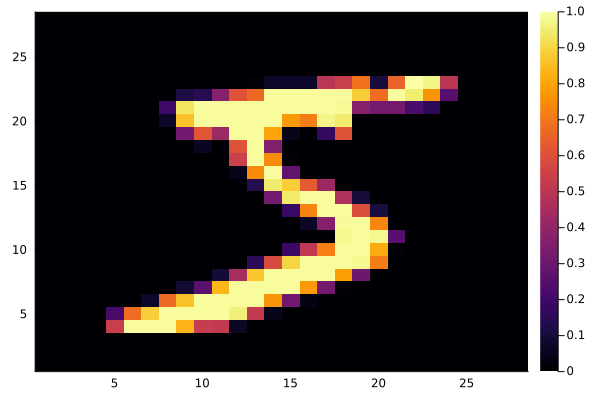

In [3]:
heatmap(rotl90(x_train[1:28, 1:28, 1])) # そのままだと横向きに表示されてしまうので、rotl90で行列を右に90度回転させる

## 特徴量の変換と必要なサンプル数だけ取得

In [4]:
# データを(サンプル数×特徴量)の行列に変換する
## 訓練データ
flatten_x_train = transpose(Flux.flatten(x_train)) # 60,000×784
### 60,000枚の画像だと多すぎるので、最初の1,000枚だけを使う
flatten_x_train = flatten_x_train[1:1000, :]

## テストデータ
flatten_x_test = transpose(Flux.flatten(x_test)) # 10,000×784
### 10,000枚の画像だと多すぎるので、最初の1,000枚だけを使う
flatten_x_test = flatten_x_test[1:1000, :]

1000×784 Matrix{Float32}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

## 目的変数のone-hot-labelへの変換

In [5]:
## 訓練データ
one_hot_label_y_train =  permutedims(onehotbatch(y_train, 0:9)) # 60,000×10
### 60,000枚の画像だと多すぎるので、最初の1,000枚だけを使う
one_hot_label_y_train = one_hot_label_y_train[1:1000, :]

## テストデータ
one_hot_label_y_test = permutedims(onehotbatch(y_test, 0:9)) # 10,000×10
### 10,000枚の画像だと多すぎるので、最初の1,000枚だけを使う
one_hot_label_y_test = one_hot_label_y_test[1:1000, :]

1000×10 Matrix{Bool}:
 0  0  0  0  0  0  0  1  0  0
 0  0  1  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 0  0  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0  1
 ⋮              ⋮           
 0  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0
 0  0  1  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 1  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  1

# 過学習を起こすニューラルネットワーク

## パッケージの読み込み

In [6]:
using LinearAlgebra
using Statistics
using Random

In [7]:
"""
データ
    訓練データ(特徴量)：flatten_x_train
    訓練データ(目的変数)：one_hot_label_y_train
"""

"""
パラメータ
"""
# 学習率
α = 0.005

# 入力層のサイズ
input_size = size(flatten_x_train)[2] # 784

# 隠れ層のサイズ
hidden_size = 300

# 出力層のサイズ
output_size = 10

W_0_1 = 0.2*rand(input_size, hidden_size).-0.1
W_1_2 = 0.2*rand(hidden_size, output_size).-0.1

# イテレーション
max_iteration = 100

"""
関数
"""
# 活性化関数(ReLU)
relu(x) = (x>0)*x

# 活性化関数(ReLU)の微分
relu2deriv(output) = output>0

"""
誤差逆伝播法
"""
# MSEを保存する用のリストを作成
mse_train_list = []
mse_test_list = []

for iteration=1:max_iteration
    for index=1:size(flatten_x_train)[1]
        # 順伝播
        layer_0 = flatten_x_train[index, :]' # flatten_x_train[index, :]は横ベクトルで値を取得したはずが、縦ベクトルに勝手に変換されてしまう。そのため転置を行っている。
        layer_1_1 = layer_0*W_0_1 # 中間層の活性化関数に入れる前
        layer_1_2 = relu.(layer_1_1) # 中間層の活性化関数に入れた後
        layer_2 = layer_1_2*W_1_2
            
        # 更新式の差分
        ## layer_2のパラメータの更新式の差分
        ### layer_2ではなく、layer_2[1]としているのは、layer2が(1, 1)の行列になっているから
        layer_2_delta = layer_2-one_hot_label_y_train[index, :]'
        W_1_2_delta = α*layer_1_2'*layer_2_delta 
        
        ## layer_1のパラメータの更新式の差分
        W_0_1_delta = α*reshape(layer_0, 1, 784)'*(W_1_2*layer_2_delta'.*relu2deriv.(layer_1_1'))'

        # 更新
        W_1_2 = W_1_2-W_1_2_delta        
        W_0_1 = W_0_1-W_0_1_delta
        
    end
    
    # MSE(Mean Square Error)の計算
    ## 全てのデータに対して順伝播を行う
    ### 学習データ
    Layer_1_1_train = flatten_x_train*W_0_1 # 中間層の活性化関数に入れる前
    Layer_1_2_train = relu.(Layer_1_1_train) # 中間層の活性化関数に入れた後
    pred_list_train = Layer_1_2_train*W_1_2
    
    mse_train = mean((pred_list_train-one_hot_label_y_train).^2)
    push!(mse_train_list, mse_train)
        
    ### テストデータ
    Layer_1_1_test = flatten_x_test*W_0_1 # 中間層の活性化関数に入れる前
    Layer_1_2_test = relu.(Layer_1_1_test) # 中間層の活性化関数に入れた後
    pred_list_test = Layer_1_2_test*W_1_2
    
    mse_test = mean((pred_list_test-one_hot_label_y_test).^2)
    push!(mse_test_list, mse_test)
        
end

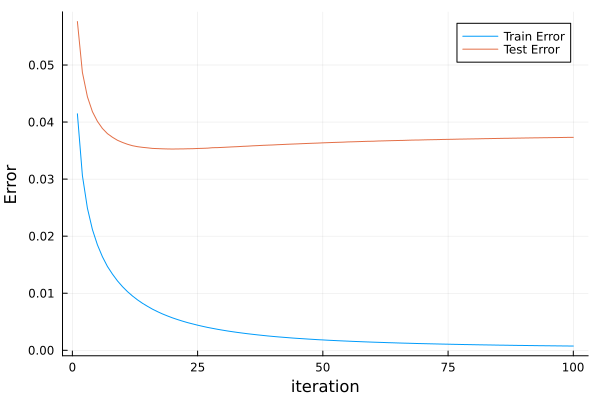

In [8]:
plot(1:max_iteration, mse_train_list, label="Train Error", xlabel="iteration", ylabel="Error")
plot!(1:max_iteration, mse_test_list, label="Test Error", xlabel="iteration", ylabel="Error")

# ドロップアウトを入れたニューラルネットワーク

In [9]:
using LinearAlgebra, Statistics, Random
"""
データ
    訓練データ(特徴量)：flatten_x_train
    訓練データ(目的変数)：one_hot_label_y_train
"""

"""
パラメータ
"""
# 学習率
α = 0.005

# 入力層のサイズ
input_size = size(flatten_x_train)[2] # 784

# 隠れ層のサイズ
hidden_size = 300

# 出力層のサイズ
output_size = 10

W_0_1 = 0.2*rand(input_size, hidden_size).-0.1
W_1_2 = 0.2*rand(hidden_size, output_size).-0.1

# イテレーション
max_iteration = 100

"""
関数
"""
# 活性化関数(ReLU)
relu(x) = (x>0)*x

# 活性化関数(ReLU)の微分
relu2deriv(output) = output>0

"""
誤差逆伝播法
"""
# MSEを保存する用のリストを作成
mse_train_dropout_list = []
mse_test_dropout_list = []

for iteration=1:max_iteration
    for index=1:size(flatten_x_train)[1]
        # 順伝播
        layer_0 = flatten_x_train[index, :]' # flatten_x_train[index, :]は横ベクトルで値を取得したはずが、縦ベクトルに勝手に変換されてしまう。そのため転置を行っている。
        layer_1_1 = layer_0*W_0_1 # 中間層の活性化関数に入れる前
        layer_1_2 = relu.(layer_1_1) # 中間層の活性化関数に入れた後
        
##############################Dropoutを行っている箇所################################
        dropout_mask = reshape(rand(0:2, size(layer_1_2)[2]), 1, size(layer_1_2)[2])
        layer_1_2 = layer_1_2.*dropout_mask
#####################################################################################        
        layer_2 = layer_1_2*W_1_2
            
        # 更新式の差分
        ## layer_2のパラメータの更新式の差分
        ### layer_2ではなく、layer_2[1]としているのは、layer2が(1, 1)の行列になっているから
        layer_2_delta = layer_2-one_hot_label_y_train[index, :]'
        W_1_2_delta = α*layer_1_2'*layer_2_delta
        
        ## layer_1のパラメータの更新式の差分
        layer_1_delta = (W_1_2*layer_2_delta'.*relu2deriv.(layer_1_1'))'
        layer_1_delta = layer_1_delta.*dropout_mask
        W_0_1_delta = α*reshape(layer_0, 1, 784)'*layer_1_delta

        # 更新
        W_1_2 = W_1_2-W_1_2_delta        
        W_0_1 = W_0_1-W_0_1_delta
        
    end
    
    # MSE(Mean Square Error)の計算
    ## 全てのデータに対して順伝播を行う
    ### 訓練データ
    Layer_1_1_train = flatten_x_train*W_0_1 # 中間層の活性化関数に入れる前
    Layer_1_2_train = relu.(Layer_1_1_train) # 中間層の活性化関数に入れた後
    pred_list_train = Layer_1_2_train*W_1_2
    
    mse_train = mean((pred_list_train-one_hot_label_y_train).^2)
    push!(mse_train_dropout_list, mse_train)
        
    ### テストデータ
    Layer_1_1_test = flatten_x_test*W_0_1 # 中間層の活性化関数に入れる前
    Layer_1_2_test = relu.(Layer_1_1_test) # 中間層の活性化関数に入れた後
    pred_list_test = Layer_1_2_test*W_1_2
    
    mse_test = mean((pred_list_test-one_hot_label_y_test).^2)
    push!(mse_test_dropout_list, mse_test)
        
end

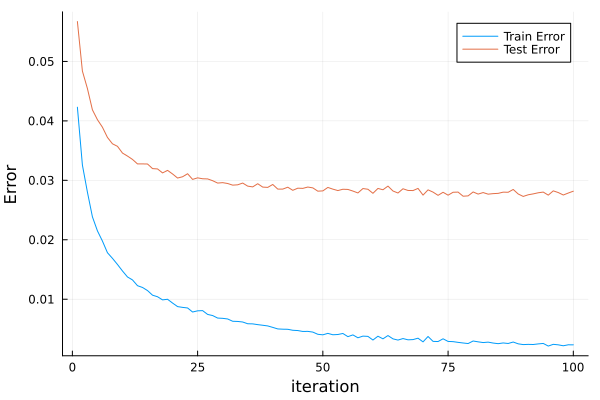

In [10]:
using Plots
plot(1:max_iteration, mse_train_dropout_list, label="Train Error", xlabel="iteration", ylabel="Error")
plot!(1:max_iteration, mse_test_dropout_list, label="Test Error", xlabel="iteration", ylabel="Error")